In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import json
import datetime as dt
import calendar
 
df = pd.read_json('../data/database-27-10.json')

target = "Covid-19-Pandemie"
short = "covid"

#### Filter die Artikel nach: Sind zwischen dem und dem Datum veröffentlich worden.

In [40]:
df = df.loc[(df['date'] >= "2022-07-16") & (df['date'] <= "2022-10-27")]

#### Füge ein neues Feature hinzu: Themengebiet

In [41]:
topics = json.loads(open("topics/topics.json", "r").read())

df['tags_full'] = ['; '.join(tags) for tags in df['tags'].to_list()]

for topic in topics:
    df.loc[(df.title.str.contains('|'.join(topics[topic]['keywords'])) | df.tags_full.str.contains('|'.join(topics[topic]['keywords']))), 'topic'] = topic

#### Füge vier neue Features hinzu: Tag, Woche, Monat, Jahr

In [42]:
df['day'] = df['date'].dt.day
df['week'] = df['date'].dt.isocalendar().week
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

#### Füge zwei neue Features hinzu: Anzahl Wörter, Anzahl Zeichen

In [43]:
df['content_length'] = df['content'].str.len()
df['content_words'] = df['content'].str.split().map(len)

#### Filter die Artikel nach: Sind dem Themengebiet „Covid-19-Pandemie“ zugeordnet

In [44]:
df = df.loc[(df.topic == target)]

## 1. Gruppiere Artikel nach: Monat (eindeutig)

In [45]:
df_month = df.groupby(["month", "year"])['content_words'].mean().reset_index(name="average_content_words")

In [46]:
df_month['month_name'] = df_month['month'].apply(lambda x: calendar.month_abbr[x])

df_month['date'] = df_month['month_name'] + " " + df_month['year'].astype(str)

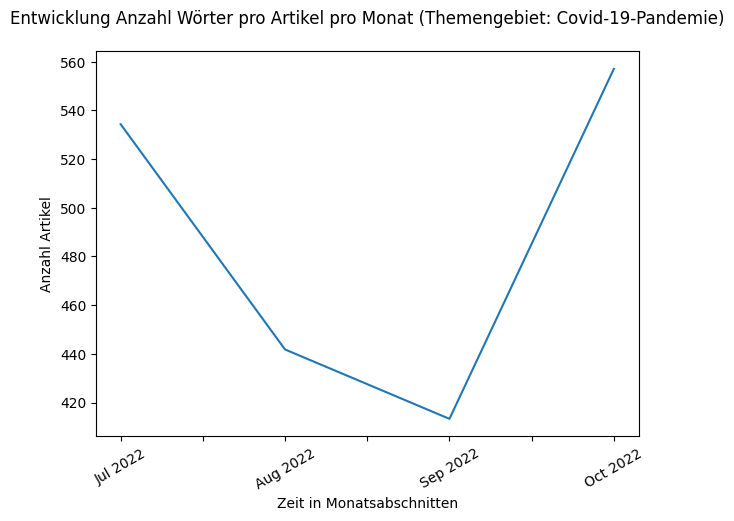

In [47]:
plt.style.use('default') # 'default' or 'dark_background'

fig, ax = plt.subplots()

ax = df_month.plot(kind="line", x="date", y="average_content_words", ax=ax, rot=30, xlabel="Zeit in Monatsabschnitten", figsize=(7,5), ylabel="Anzahl Artikel", legend=False)

ax.set_title(f'Entwicklung Anzahl Wörter pro Artikel pro Monat (Themengebiet: {target})', pad=20)

fig.savefig(f'figures/bar-{short}-words-trend-month.png')

## 2. Gruppiere Artikel nach: Woche (eindeutig)

In [48]:
df_year = df.groupby(["week", "year"])['content_words'].mean().reset_index(name="average_content_words")

In [49]:
df_year['date'] = "KW " + df_year['week'].astype(str) + " " + df_year['year'].astype(str)

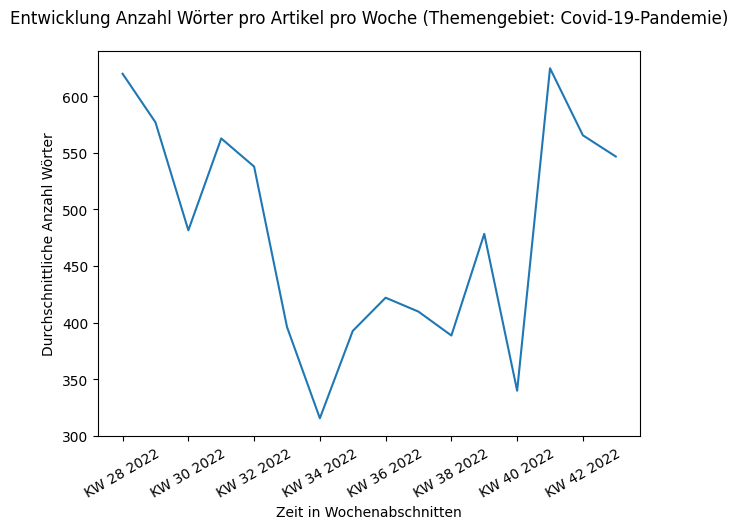

In [52]:
plt.style.use('default') # 'default' or 'dark_background'

fig, ax = plt.subplots()

ax = df_year.plot(kind="line", x="date", y="average_content_words", ax=ax, rot=30, xlabel="Zeit in Wochenabschnitten", figsize=(7,5), ylabel="Durchschnittliche Anzahl Wörter", legend=False)

ax.set_title(f'Entwicklung Anzahl Wörter pro Artikel pro Woche (Themengebiet: {target})', pad=20)

fig.savefig(f'figures/bar-{short}-words-trend-week.png')